<a href="https://colab.research.google.com/github/MamatkulovBunyodbek1999/My-portfoilio-samples/blob/main/Advertisement_sales_Results_LR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science and Artificial  Intellegence Prakticum

## 5-MODUL. Machine Learning. 

### Portfolio Project. Simple Linear Regression


###Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###Importing our data

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


### Checking if there is any missing values >>>

In [24]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

###Checking if df has any int value >>>

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [27]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


##Now let's see which column has more correlation then the others >>>

In [28]:
Correlation=list(['TV','Radio','Newspaper', 'Sales'])
df[Correlation].corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


### TV ADs and sales correlation is 0.901208, which means we will work with TV column in the upcoming procces ! 

#Let's visualize our correlations to see the difference >>>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Heat_Map

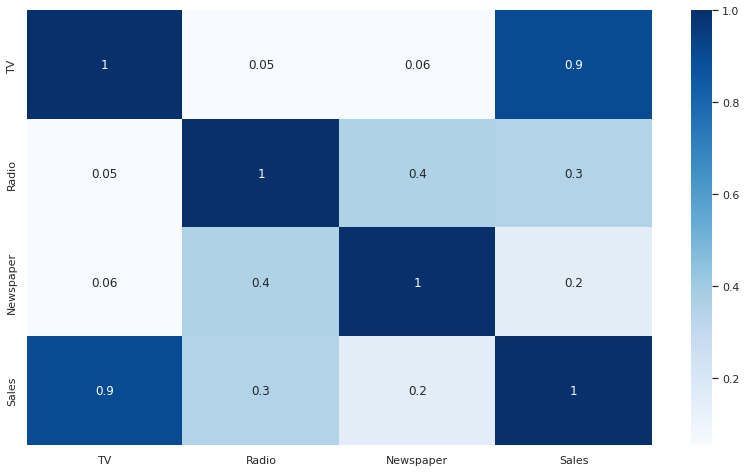

In [30]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

#Heat_Map

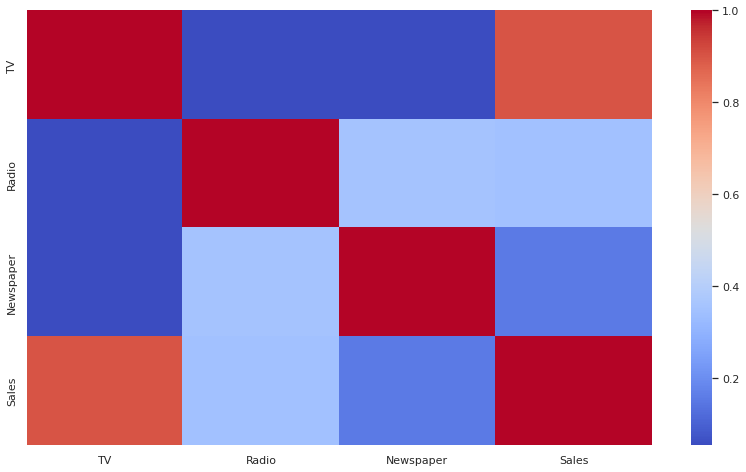

In [31]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, cmap="coolwarm")

#Heat-Map

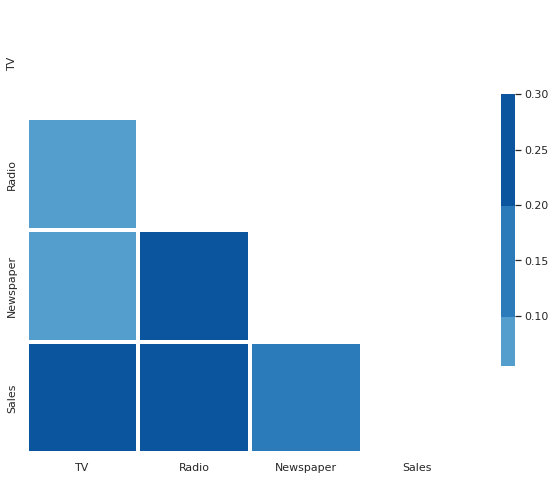

In [34]:
sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(df.corr())
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("Blues")

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5}
           )
plt.show()

#Pair_plot

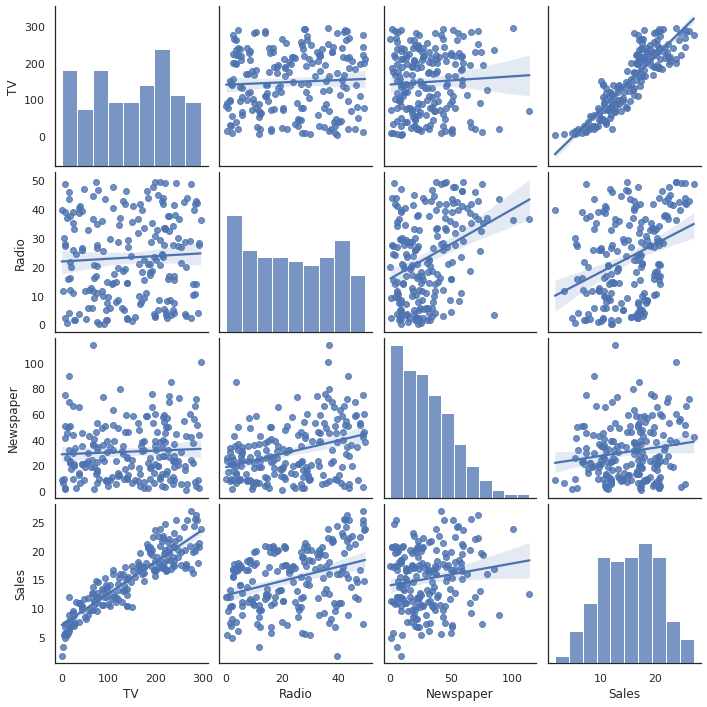

In [33]:
sns.pairplot(df, kind="reg")

### As we can see from the graphs above that TV ADs are much more effectable then the other sources

In [35]:
df.shape

(200, 4)

In [36]:
housing = df

#Train_Test_Split

In [37]:
from sklearn.model_selection import train_test_split 
train_set , test_set = train_test_split(housing, test_size=0.1, random_state=42)

In [38]:
import numpy as np

#Linear-Regression

In [39]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])

#Teaching our model
LR_model.fit(x_train, y_train)

#Separating Theta1 and Theta0 
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print(theta1)
theta0


0.05513263076693964


7.044916461655207

#Let's visualize correlation and Linear_regression plot

Text(0, 0.5, 'Sales')

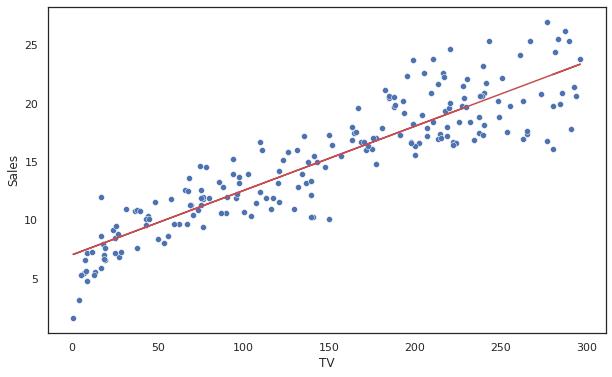

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='TV', y='Sales')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("TV")
plt.ylabel("Sales")

In [41]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

#Prediction Part

In [42]:
y_predict = LR_model.predict(x_test)

#RMSE and MAE

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(MAE)
print(RMSE)

2.037955356968121
2.5103822386472214


In [45]:
y_predict

array([[16.04807507],
       [17.81783251],
       [23.19326401],
       [ 7.68996824],
       [19.19063502],
       [11.18537703],
       [18.99767081],
       [ 9.801548  ],
       [19.30641354],
       [16.69864011],
       [ 8.78159433],
       [10.14337031],
       [19.97351838],
       [ 7.34263267],
       [14.73591845],
       [16.42849022],
       [ 7.44738467],
       [17.9391243 ],
       [11.19640356],
       [20.13340301]])

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

#Test 

In [47]:
X_test = test_set.drop('Sales', axis=1)
X_test

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [48]:
y_test = test_set['Sales'].copy()
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
Name: Sales, dtype: float64

In [49]:
lin_mse = mean_squared_error(y_test, y_predict)
# RMSE 
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

2.5103822386472214


#Mean_Squarred_Error is about 2.5